<a href="https://colab.research.google.com/github/NagammaiSP/Toxic-Tweets/blob/main/Toxic_Bow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from typing import Union
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
import string
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/FinalBalancedDataset.csv")
len(df)

56745

In [4]:
def drop(DataFrame : object, columns : Union[str,list]):
    try:
        DataFrame.drop(columns,axis=1,inplace=True)
        print(f'Succefully Dropped "{columns}" columns')
    except Exception as e:
        print(e)

In [5]:
drop(df,'Unnamed: 0')

"['Unnamed: 0'] not found in axis"


In [6]:
df

,id,Toxicity,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
56740,56741,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56742,1,"you've gone and broke the wrong heart baby, an..."
56742,56743,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56744,1,youu got wild bitches tellin you lies


In [7]:
#Removing punctuations and digits from the string
def remove_punc_dig(text : str):
    '''
    text : str
    This function will remove all the punctuations and digits from the "text"
    '''
    to_remove = string.punctuation + string.digits
    cur_text = ""
    for i in range(len(text)):
        if text[i] in to_remove:
            cur_text += " "
        else:
            cur_text += text[i].lower()
    cur_text = " ".join(cur_text.split())
    return cur_text

In [8]:
df['cur_tweet'] = df['tweet'].apply(lambda x:remove_punc_dig(x))

In [9]:
df

,id,Toxicity,tweet,cur_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use c...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in urð...
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
56740,56741,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you s a muthaf in lie lifeasking pearls corey ...
56741,56742,1,"you've gone and broke the wrong heart baby, an...",you ve gone and broke the wrong heart baby and...
56742,56743,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like i aint fu...
56743,56744,1,youu got wild bitches tellin you lies,youu got wild bitches tellin you lies


In [10]:
# we don't need tweet column now so dropping the column
drop(df,'tweet')

Succefully Dropped "tweet" columns


In [11]:
# removing stop words like I,my,myself,etc
from spacy.lang.en.stop_words import STOP_WORDS

In [12]:
# we will use spacy lemmatizer API to perform lemmatization on cur_tweet and removing stop words
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [13]:
def remove_stop_words(text: str):
    '''
    text : str
    This function will remove stop words like I,my,myself etc
    '''
    filtered_sentence = []
    for word in text.split(' '):
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return " ".join(filtered_sentence)

In [14]:
#applying remove_stop_words function on cur_tweets of dataframe df
df['filtered_cur_tweet'] = df['cur_tweet'].apply(lambda x : remove_stop_words(x))

In [15]:
# we don't need the cur_tweet now so dropping the cur_tweet column
drop(df,'cur_tweet')

Succefully Dropped "cur_tweet" columns


In [16]:
def lemmatizer(text : str):
    '''
    text : str
    Applying lemmatization for all words of "text"
    '''
    return " ".join([token.lemma_ for token in nlp(text)])

In [17]:
#applying lemmatizer function on cur_tweets of dataframe df
df['lemma_cur_tweet'] = df['filtered_cur_tweet'].apply(lambda x : lemmatizer(x))

In [18]:
# droping filtered_cur_tweet column since we don't need it any more
drop(df,'filtered_cur_tweet')

Succefully Dropped "filtered_cur_tweet" columns


In [19]:
#TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [20]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
bow = bow_vectorizer.fit_transform(df['lemma_cur_tweet'])
bow.shape

(56745, 20056)

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['lemma_cur_tweet'])
tfidf.shape

(56745, 20056)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [23]:
x_train, x_test,y_train, y_test = train_test_split(bow,df['Toxicity'] ,
                                   test_size=0.20)

In [24]:
def plot_confusion_matrices(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [25]:
def plot_roc_auc_curve(y_true, y_scores, title):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc = roc_auc_score(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

SVC
*******Train************
Accuracy:  0.979381443298969
Precision:  0.9877410832232497
Recall:  0.963705727689849
F1 Score:  0.9755753875058714
*******Test************
Accuracy:  0.9456339765618116
Precision:  0.9706618148737776
Recall:  0.8973927670311186
F1 Score:  0.9325904075166612

 



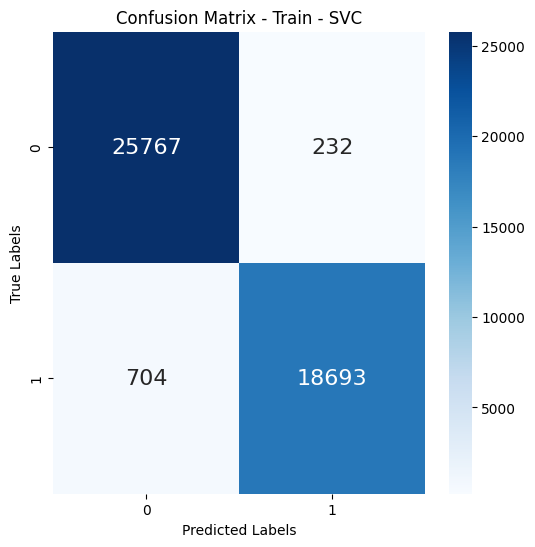

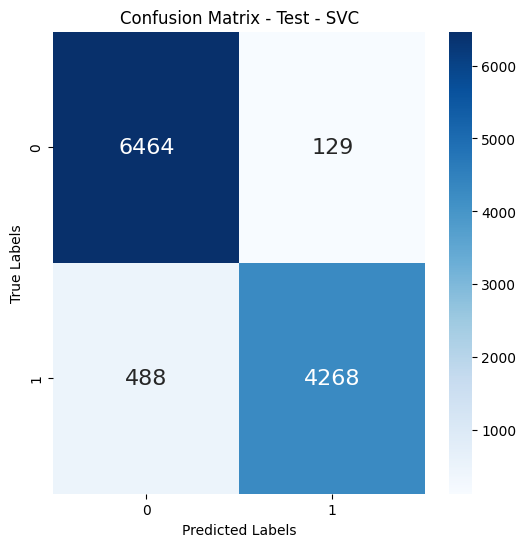

KNeighborsClassifier
*******Train************
Accuracy:  0.924574852409904
Precision:  0.9705414481824074
Recall:  0.8492550394390885
F1 Score:  0.9058564751168546
*******Test************
Accuracy:  0.9058066790025553
Precision:  0.958468042775429
Recall:  0.8103448275862069
F1 Score:  0.878204397858038

 



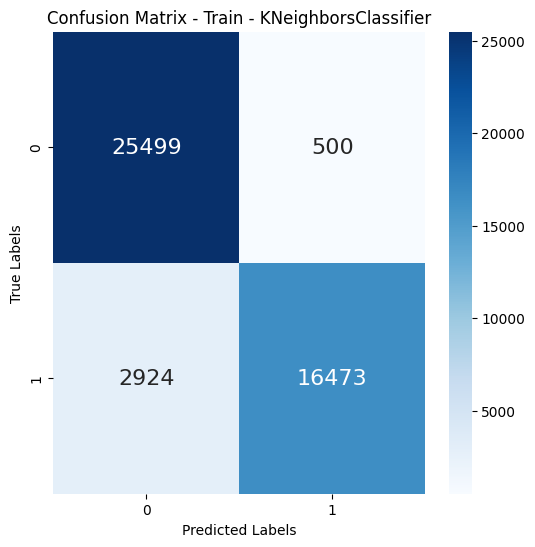

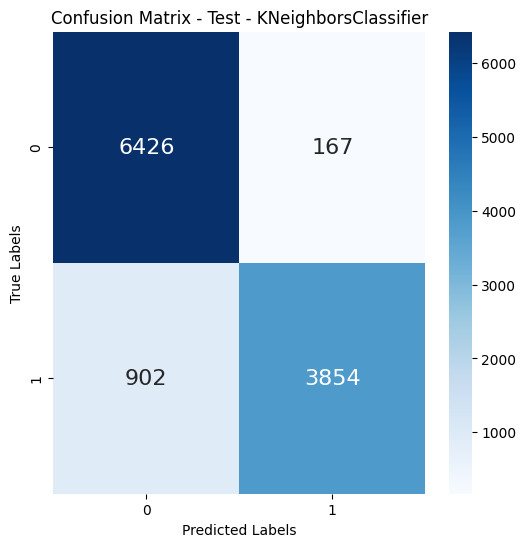

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
*******Train************
Accuracy:  0.9728390166534496
Precision:  0.9829309794746357
Recall:  0.9529824199618497
F1 Score:  0.9677250477711175
*******Test************
Accuracy:  0.9466913384439157
Precision:  0.9656719766659188
Recall:  0.9049621530698065
F1 Score:  0.9343319222837296

 



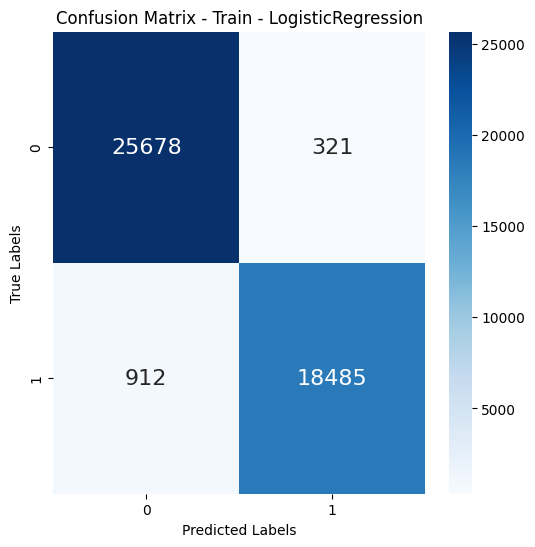

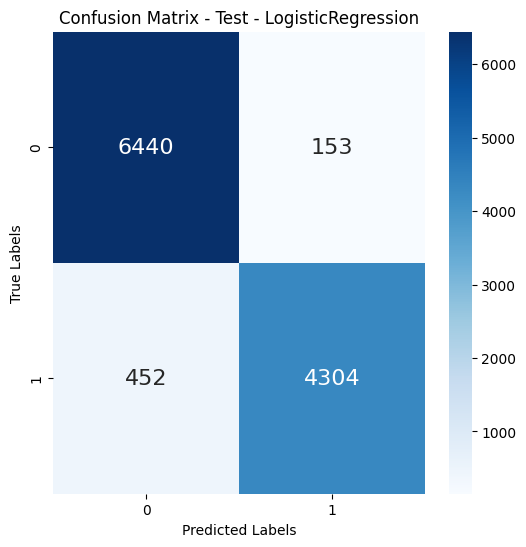

DecisionTreeClassifier
*******Train************
Accuracy:  0.9995594325491233
Precision:  0.9996390077871178
Recall:  0.999329793267
F1 Score:  0.999484376611323
*******Test************
Accuracy:  0.9372631949951538
Precision:  0.9326059050064185
Recall:  0.9165264928511354
F1 Score:  0.9244962884411453

 



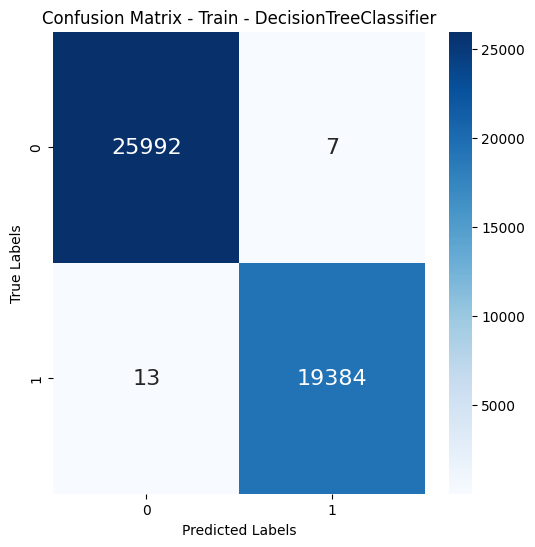

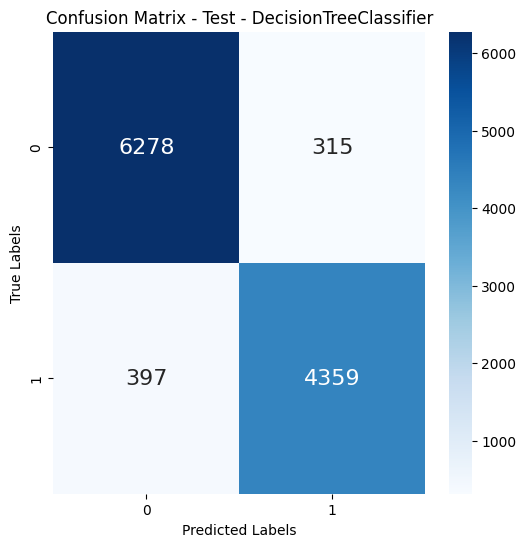

RandomForestClassifier
*******Train************
Accuracy:  0.9995594325491233
Precision:  0.9994844563592308
Recall:  0.9994844563592308
F1 Score:  0.9994844563592308
*******Test************
Accuracy:  0.9413164155432197
Precision:  0.94398610508033
Recall:  0.9142136248948697
F1 Score:  0.9288613544114505

 



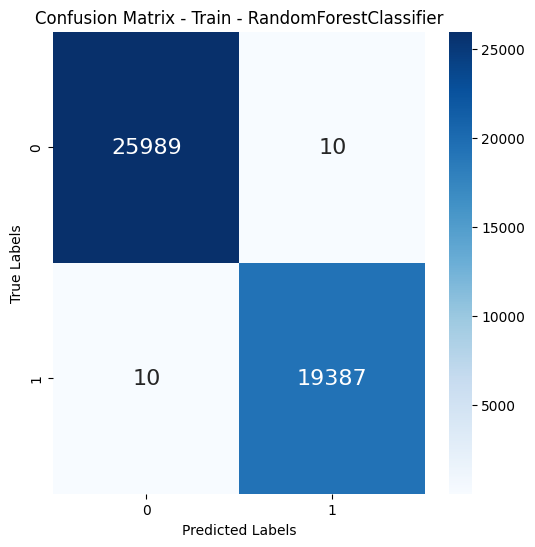

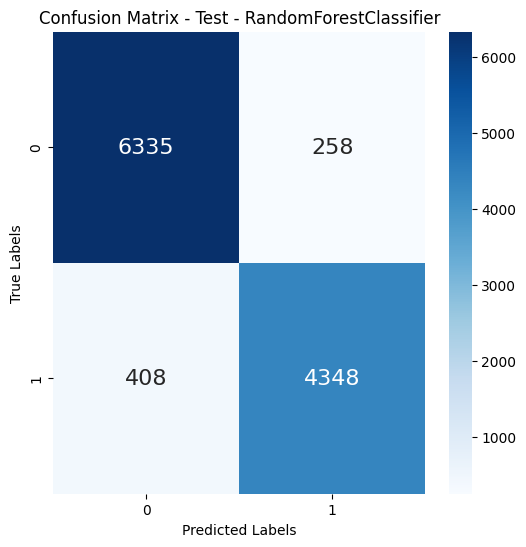

MultinomialNB
*******Train************
Accuracy:  0.93695479777954
Precision:  0.9058863959939123
Recall:  0.9512811259473114
F1 Score:  0.9280289694714078
*******Test************
Accuracy:  0.9199048374306106
Precision:  0.8847769553910783
Recall:  0.9299831791421362
F1 Score:  0.906817016914403

 



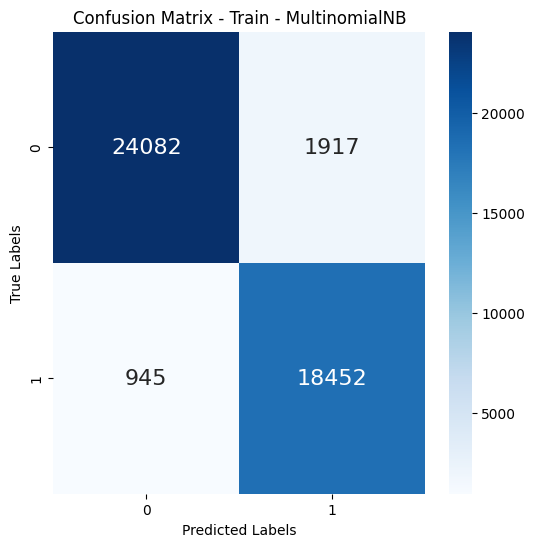

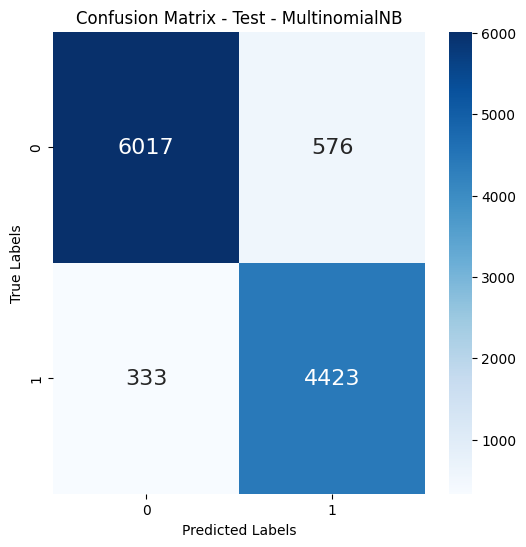

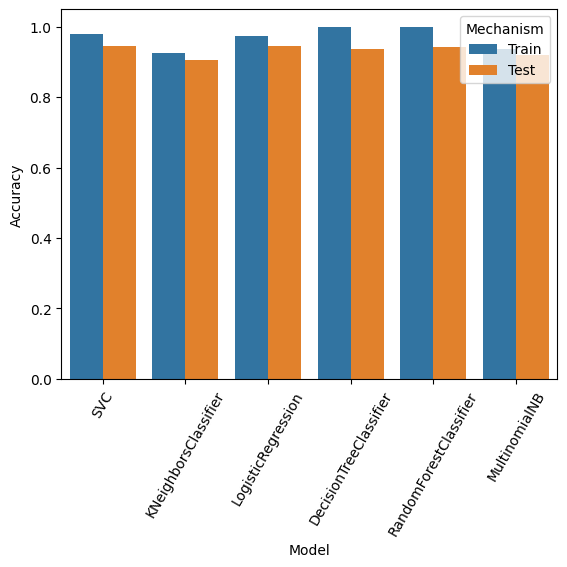

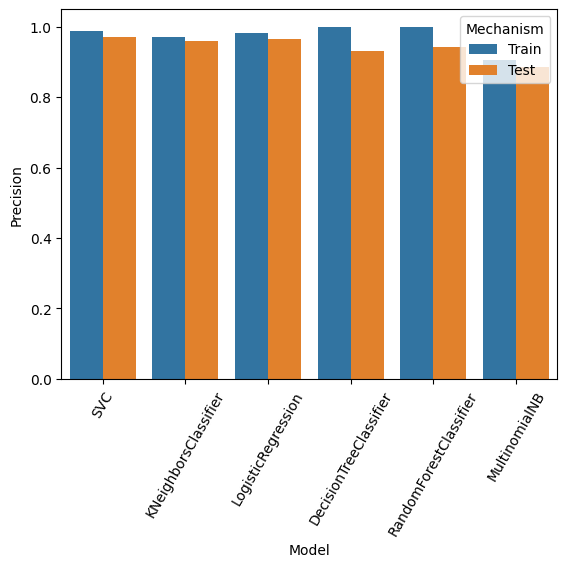

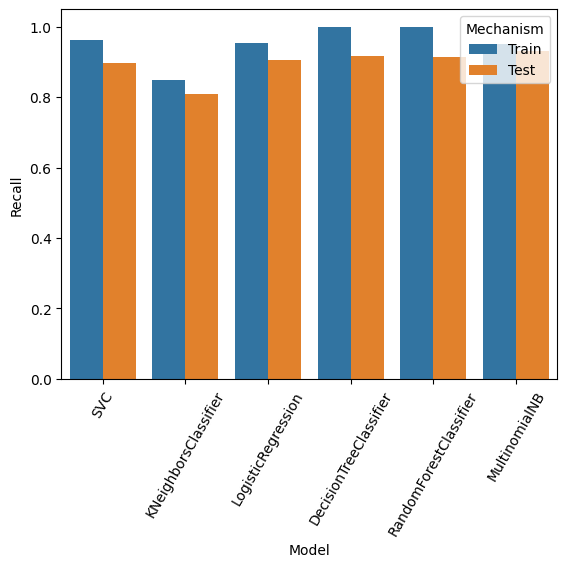

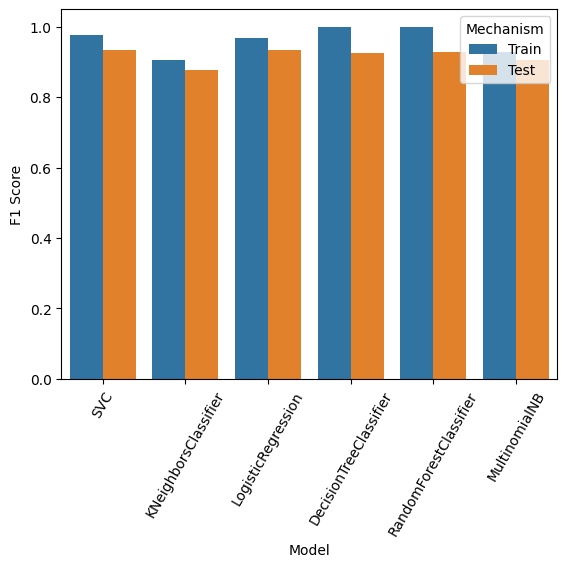

In [26]:
models = [SVC(),KNeighborsClassifier(),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),MultinomialNB()]
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1s = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []
model_names = []
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    #train_probs = model.predict_proba(x_train)[:, 1]
    test_pred = model.predict(x_test)
    #test_probs = model.predict_proba(x_test)[:, 1]
    print(type(model).__name__)
    model_names.append(type(model).__name__)
    print("*******Train************")
    print("Accuracy: ",accuracy_score(y_train,train_pred))
    print("Precision: ",precision_score(y_train,train_pred))
    print("Recall: ",recall_score(y_train,train_pred))
    print("F1 Score: ",f1_score(y_train,train_pred))
    train_accuracies.append(accuracy_score(y_train,train_pred))
    train_precisions.append(precision_score(y_train,train_pred))
    train_recalls.append(recall_score(y_train,train_pred))
    train_f1s.append(f1_score(y_train,train_pred))

    print("*******Test************")
    print("Accuracy: ",accuracy_score(y_test,test_pred))
    print("Precision: ",precision_score(y_test,test_pred))
    print("Recall: ",recall_score(y_test,test_pred))
    print("F1 Score: ",f1_score(y_test,test_pred))
    test_accuracies.append(accuracy_score(y_test,test_pred))
    test_precisions.append(precision_score(y_test,test_pred))
    test_recalls.append(recall_score(y_test,test_pred))
    test_f1s.append(f1_score(y_test,test_pred))
    print("\n \n")
    # Calculate and display the confusion matrix for training data
    plot_confusion_matrices(y_train, train_pred, f"Confusion Matrix - Train - {type(model).__name__}")

    # Calculate and display the confusion matrix for testing data
    plot_confusion_matrices(y_test, test_pred, f"Confusion Matrix - Test - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for training data
    '''plot_roc_auc_curve(y_train, train_probs, f"ROC-AUC Curve - Train - {type(model).__name__}")

    # Calculate and display the ROC-AUC curve for testing data
    plot_roc_auc_curve(y_test, test_probs, f"ROC-AUC Curve - Test - {type(model).__name__}")'''

train_df = pd.DataFrame()
train_df['Accuracy'] =  train_accuracies
train_df['Precision'] =  train_precisions
train_df['Recall'] =  train_recalls
train_df['F1 Score'] =  train_f1s
train_df['Mechanism'] = "Train"
train_df['Model'] = model_names

test_df = pd.DataFrame()
test_df['Accuracy'] =  test_accuracies
test_df['Precision'] =  test_precisions
test_df['Recall'] =  test_recalls
test_df['F1 Score'] =  test_f1s
test_df['Mechanism'] = "Test"
test_df['Model'] = model_names

result_df = pd.concat([train_df, test_df])
for metric in ['Accuracy','Precision','Recall','F1 Score']:
    sns.barplot(data =result_df,x ='Model',y = metric,hue="Mechanism")
    plt.xticks(rotation=60)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


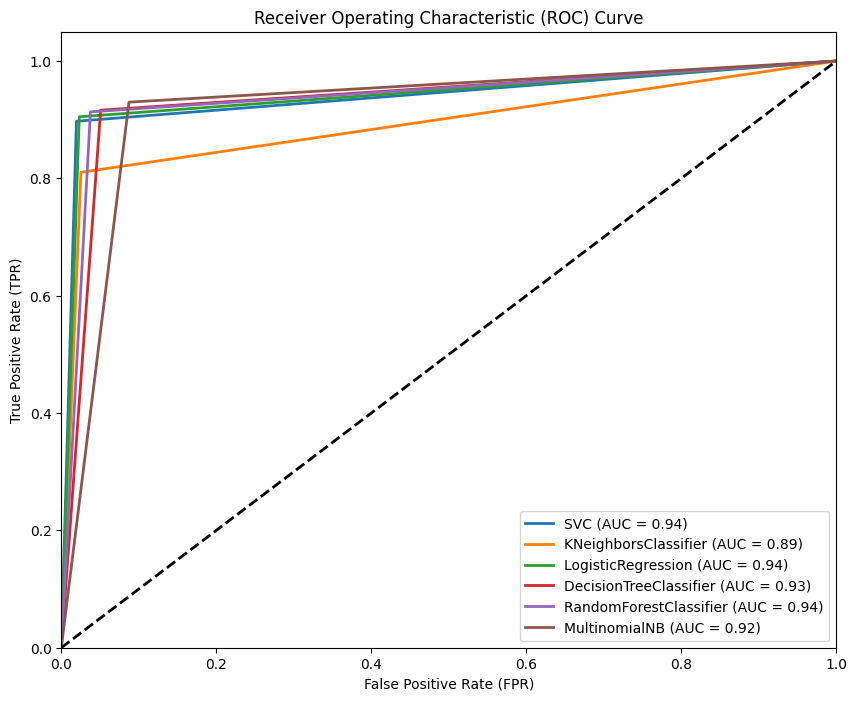

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store ROC curve data
fpr_list = []
tpr_list = []
roc_auc_list = []
model_names = []

models = [SVC(), KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB()]

for model in models:
    model_name = type(model).__name__
    model_names.append(model_name)

    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

    # Calculate ROC-AUC score
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 8))
for i in range(len(models)):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'{model_names[i]} (AUC = {roc_auc_list[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
